# **ISTA 322 Final Project**

In honor of everyone's 2024 Spotify Wrapped coming out, the goal of this project will be to examine my top artist of the year and my favorite artist of all time - BTS! I've been a BTS fan since around August of 2015 (the summer before sixth grade!), and I've witnessed their tremendous growth as artists throughout the years.

I thought it'd be interesting to explore their present-day popularity, as well as their most streamed songs on Spotify. Additionally, I'll only look at songs that are released under their group Spotify artist profile BTS. Although all members are successful soloists and have had amazing collabs, I won't include any solo or collab songs that are released under a different artist's profile for simplicity.

The end goal of the project will be to determine the top songs that have made it to the billions club (songs with over 1 billion streams), and songs that are coming close to acheiving this milestone, including roughly how much longer it'll take for them to do so. Let's get started!

# Part 1: Extracting Spotify API data in JSON format

We will begin by flattening and transforming data from Spotify that shows artist/album/song info using the Spotipy package.

Mount drive and give access

In [2]:
# run this cell the first time, and after installing the api, the session may need to be restarted
# after restarting, skip this cell and run the next one instead

import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [6]:
# run this cell after installing the package and restarting the session
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
sys.path.insert(0, nb_path)

Mounted at /content/mnt


Install library

In [5]:
# install only once
!pip install --target=$nb_path spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 9.3 MB/s eta 0:00:00


Import spotipy and input credentials

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

spotify_client_id = "2f3738aa2ba64b5294fefc5fbf4a84a1"
spotify_client_secret  = "451bc3c5cfb14bc8a4baf9c772b7ff58"

client_credentials_manager = SpotifyClientCredentials(
    client_id=spotify_client_id,
    client_secret=spotify_client_secret
)

sp = spotipy.Spotify(
    client_credentials_manager=client_credentials_manager
)

Getting artist info - BTS

In [8]:
# import libraries
import pandas as pd
from pandas import json_normalize

# get artist URI
art = sp.artist('spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX')

In [9]:
# check it out
art

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
 'followers': {'href': None, 'total': 77096667},
 'genres': ['k-pop', 'k-pop boy group', 'pop'],
 'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
 'id': '3Nrfpe0tUJi4K4DXYWgMUX',
 'images': [{'url': 'https://i.scdn.co/image/ab6761610000e5ebd642648235ebf3460d2d1f6a',
   'height': 640,
   'width': 640},
  {'url': 'https://i.scdn.co/image/ab67616100005174d642648235ebf3460d2d1f6a',
   'height': 320,
   'width': 320},
  {'url': 'https://i.scdn.co/image/ab6761610000f178d642648235ebf3460d2d1f6a',
   'height': 160,
   'width': 160}],
 'name': 'BTS',
 'popularity': 87,
 'type': 'artist',
 'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}

Mapping JSON to a dataframe

In [10]:
# takes an artist ID and then stores the name, id, followers, genre, and popularity into a list

def get_artist_info(art_id):
  art_json = sp.artist(art_id) # calling out to the spotipy function using the artist URI
  artist_name = art_json['name'] # artist name
  artist_id = art_json['id'] # artist id
  followers = art_json['followers']['total'] # total followers
  genre = art['genres'][0] # first genre in list
  popularity = art_json['popularity'] # popularity
  art_list = [artist_name, artist_id, followers, genre, popularity]
  return(art_list)

In [11]:
# call function on the URI from BTS
art_list = get_artist_info('3Nrfpe0tUJi4K4DXYWgMUX')
art_list

['BTS', '3Nrfpe0tUJi4K4DXYWgMUX', 77096667, 'k-pop', 87]

In [12]:
# turn list into a dataframe
artist_info = pd.DataFrame(data = [art_list], columns = ['artist_name', 'artist_id', 'followers', 'genre', 'popularity'])
artist_info

,artist_name,artist_id,followers,genre,popularity
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,77096667,k-pop,87


Get top/most popular BTS songs


In [13]:
# getting top 10 songs
artist_top = sp.artist_top_tracks(artist_info['artist_id'][0])
artist_top

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3Nrfpe0tUJi4K4DXYWgMUX'},
      'href': 'https://api.spotify.com/v1/artists/3Nrfpe0tUJi4K4DXYWgMUX',
      'id': '3Nrfpe0tUJi4K4DXYWgMUX',
      'name': 'BTS',
      'type': 'artist',
      'uri': 'spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX'}],
    'available_markets': ['AR',
     'AU',
     'AT',
     'BE',
     'BO',
     'BR',
     'BG',
     'CA',
     'CL',
     'CO',
     'CR',
     'CY',
     'CZ',
     'DK',
     'DO',
     'DE',
     'EC',
     'EE',
     'SV',
     'FI',
     'FR',
     'GR',
     'GT',
     'HN',
     'HK',
     'HU',
     'IS',
     'IE',
     'IT',
     'LV',
     'LT',
     'LU',
     'MY',
     'MT',
     'MX',
     'NL',
     'NZ',
     'NI',
     'NO',
     'PA',
     'PY',
     'PE',
     'PH',
     'PL',
     'PT',
     'SG',
     'SK',
     'ES',
     'SE',
     'CH',
     'TW',
     'TR',
     'UY',
     'US',
     'GB',
     'AD'

In [14]:
# 'tracks' is the only key
artist_top.keys()

dict_keys(['tracks'])

Normalize JSON data

In [15]:
# turn JSON data into a dataframe
pd.json_normalize(artist_top['tracks'])

,artists,available_markets,disc_number,duration_ms,explicit,href,id,is_local,is_playable,name,...,album.images,album.is_playable,album.name,album.release_date,album.release_date_precision,album.total_tracks,album.type,album.uri,external_ids.isrc,external_urls.spotify
0,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,199053,False,https://api.spotify.com/v1/tracks/5QDLhrAOJJdN...,5QDLhrAOJJdNAmCTJ8xMyW,False,True,Dynamite,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,BE,2020-11-20,day,8,album,spotify:album:6nYfHQnvkvOTNHnOhDT3sr,QM7282022872,https://open.spotify.com/track/5QDLhrAOJJdNAmC...
1,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,226198,False,https://api.spotify.com/v1/tracks/46HNZY1i7O6j...,46HNZY1i7O6jwTA7Slo2PI,False,True,My Universe,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,Music Of The Spheres,2021-10-15,day,12,album,spotify:album:06mXfvDsRZNfnsGZvX2zpb,GBAYE2100952,https://open.spotify.com/track/46HNZY1i7O6jwTA...
2,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,154486,False,https://api.spotify.com/v1/tracks/5Odq8ohlgIbQ...,5Odq8ohlgIbQKMZivbWkEo,False,True,Left and Right (Feat. Jung Kook of BTS),...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,CHARLIE,2022-10-06,day,12,album,spotify:album:5Jk4Eg7pxYhDrWJCVVzmMt,USAT22205563,https://open.spotify.com/track/5Odq8ohlgIbQKMZ...
3,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,242333,False,https://api.spotify.com/v1/tracks/6m1TWFMeon7a...,6m1TWFMeon7ai9XLOzdbiR,False,True,FAKE LOVE,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,Love Yourself 轉 'Tear',2018-05-18,day,11,album,spotify:album:4NIqCxqP9o8Tp6tGLBqd8O,QM4TX1817912,https://open.spotify.com/track/6m1TWFMeon7ai9X...
4,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,164952,False,https://api.spotify.com/v1/tracks/6jjYDGxVJsWS...,6jjYDGxVJsWS0a5wlVF5vS,False,True,Butter,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,Proof,2022-06-10,day,35,album,spotify:album:6al2VdKbb6FIz9d7lU7WRB,QM6MZ2156864,https://open.spotify.com/track/6jjYDGxVJsWS0a5...
5,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,229773,False,https://api.spotify.com/v1/tracks/4a9tbd947vo9...,4a9tbd947vo9K8Vti9JwcI,False,True,Boy With Luv (feat. Halsey),...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,MAP OF THE SOUL : PERSONA,2019-04-12,day,7,album,spotify:album:2KqlAl1Kl5fZvbFgJ0qFB6,QM6MZ1917908,https://open.spotify.com/track/4a9tbd947vo9K8V...
6,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",2,204939,False,https://api.spotify.com/v1/tracks/69xohKu8C1fs...,69xohKu8C1fsflYAiSNbwM,False,True,Run BTS,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,Proof,2022-06-10,day,35,album,spotify:album:6al2VdKbb6FIz9d7lU7WRB,USA2P2226298,https://open.spotify.com/track/69xohKu8C1fsflY...
7,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,207481,False,https://api.spotify.com/v1/tracks/5FVbvttjEvQ8...,5FVbvttjEvQ8r2BgUcJgNg,False,True,Life Goes On,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,BE,2020-11-20,day,8,album,spotify:album:6nYfHQnvkvOTNHnOhDT3sr,QMBZ92051791,https://open.spotify.com/track/5FVbvttjEvQ8r2B...
8,[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,274097,False,https://api.spotify.com/v1/tracks/2j1fFjWHCI9K...,2j1fFjWHCI9KJSwcuYAOyF,False,True,Spring Day,...,[{'url': 'https://i.scdn.co/image/ab67616d0000...,True,You Never Walk Alone,2017-02-13,day,18,album,spotify:album:6THpewjqJ15ORBJkh5CEYb,KRA381700253,https://open.spotify.com/track/2j1fFjWHCI9KJSw...
9,[{'e

In [16]:
# normalize 'artists' path to get artist info (BTS and collab artists) while keeping top track info
top_track_info = pd.json_normalize(artist_top['tracks'],
                  record_path=['artists'],
                  meta = ['id', 'name'],
                  record_prefix = 'artist_',
                  meta_prefix = 'track_',
                  sep = '_')
top_track_info.head()

,artist_href,artist_id,artist_name,artist_type,artist_uri,artist_external_urls_spotify,track_id,track_name
0,https://api.spotify.com/v1/artists/3Nrfpe0tUJi...,3Nrfpe0tUJi4K4DXYWgMUX,BTS,artist,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,5QDLhrAOJJdNAmCTJ8xMyW,Dynamite
1,https://api.spotify.com/v1/artists/4gzpq5DPGxS...,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,artist,spotify:artist:4gzpq5DPGxSnKTe4SA8HAU,https://open.spotify.com/artist/4gzpq5DPGxSnKT...,46HNZY1i7O6jwTA7Slo2PI,My Universe
2,https://api.spotify.com/v1/artists/3Nrfpe0tUJi...,3Nrfpe0tUJi4K4DXYWgMUX,BTS,artist,spotify:artist:3Nrfpe0tUJi4K4DXYWgMUX,https://open.spotify.com/artist/3Nrfpe0tUJi4K4...,46HNZY1i7O6jwTA7Slo2PI,My Universe
3,https://api.spotify.com/v1/artists/6VuMaDnrHyP...,6VuMaDnrHyPL1p4EHjYLi7,Charlie Puth,artist,spotify:artist:6VuMaDnrHyPL1p4EHjYLi7,https://open.spotify.com/artist/6VuMaDnrHyPL1p...,5Odq8ohlgIbQKMZivbWkEo,Left and Right (Feat. Jung Kook of BTS)
4,https://api.spotify.com/v1/artists/6HaGTQPmzra...,6HaGTQPmzraVmaVxvz6EUc,Jung Kook,artist,spotify:artist:6HaGTQPmzraVmaVxvz6EUc,https://open.spotify.com/artist/6HaGTQPmzraVma...,5Odq8ohlgIbQKMZivbWkEo,Left and Right (Feat. Jung Kook of BTS)


Cleaning/filtering dataframe

In [17]:
# dropping unnecessary columns
top_track_info = top_track_info[['artist_name', 'artist_id', 'track_name', 'track_id']]
top_track_info

,artist_name,artist_id,track_name,track_id
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW
1,Coldplay,4gzpq5DPGxSnKTe4SA8HAU,My Universe,46HNZY1i7O6jwTA7Slo2PI
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,My Universe,46HNZY1i7O6jwTA7Slo2PI
3,Charlie Puth,6VuMaDnrHyPL1p4EHjYLi7,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo
4,Jung Kook,6HaGTQPmzraVmaVxvz6EUc,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Butter,6jjYDGxVJsWS0a5wlVF5vS
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI
9,Halsey,26VFTg2z8YR0cCuwLzESi2,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI


In [18]:
# keep only main artist (BTS) so collab songs don't appear more than once
top_track_info = top_track_info[top_track_info['artist_name'].isin(artist_info['artist_name'])]
top_track_info

,artist_name,artist_id,track_name,track_id
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,My Universe,46HNZY1i7O6jwTA7Slo2PI
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Butter,6jjYDGxVJsWS0a5wlVF5vS
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI
10,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Run BTS,69xohKu8C1fsflYAiSNbwM
11,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Life Goes On,5FVbvttjEvQ8r2BgUcJgNg
12,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Spring Day,2j1fFjWHCI9KJSwcuYAOyF
13,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Permission to Dance,3XYRV7ZSHqIRDG87DKTtry


Merge artist and track dataframes together

In [19]:
# merge artist info dataframe with track info dataframe
# (give it a new name so the old dataframes aren't lost in case the merge goes wrong)
top_BTS_tracks = top_track_info.merge(artist_info, left_on = 'artist_id', right_on= 'artist_id', how = 'outer')
top_BTS_tracks

,artist_name_x,artist_id,track_name,track_id,artist_name_y,followers,genre,popularity
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,BTS,77096667,k-pop,87
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,My Universe,46HNZY1i7O6jwTA7Slo2PI,BTS,77096667,k-pop,87
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo,BTS,77096667,k-pop,87
3,BTS,3Nrfpe0tUJi4K4DXYWgMUX,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR,BTS,77096667,k-pop,87
4,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Butter,6jjYDGxVJsWS0a5wlVF5vS,BTS,77096667,k-pop,87
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI,BTS,77096667,k-pop,87
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Run BTS,69xohKu8C1fsflYAiSNbwM,BTS,77096667,k-pop,87
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Life Goes On,5FVbvttjEvQ8r2BgUcJgNg,BTS,77096667,k-pop,87
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Spring Day,2j1fFjWHCI9KJSwcuYAOyF,BTS,77096667,k-pop,87
9,BTS,3Nrfpe0tUJi4K4DXYWgMUX,Permission to Dance,3XYRV7ZSHqIRDG87DKTtry,BTS,77096667,k-pop,87


In [20]:
# rearranging columns & renaming artist_name
top_BTS_tracks = top_BTS_tracks[['artist_name_x', 'artist_id', 'genre', 'followers', 'popularity', 'track_name', 'track_id']]
top_BTS_tracks.columns = ['artist_name', 'artist_id', 'genre', 'followers', 'popularity', 'track_name', 'track_id']
top_BTS_tracks

,artist_name,artist_id,genre,followers,popularity,track_name,track_id
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,My Universe,46HNZY1i7O6jwTA7Slo2PI
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo
3,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR
4,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Butter,6jjYDGxVJsWS0a5wlVF5vS
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Run BTS,69xohKu8C1fsflYAiSNbwM
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Life Goes On,5FVbvttjEvQ8r2BgUcJgNg
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Spring Day,2j1fFjWHCI9KJSwcuYAOyF
9,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Permission to Dance,3XYRV7ZSHqIRDG87DKTtry


# Part 2: Extracting pre-imported csv dataset from Amazon S3

Next, we will find data on the number of streams of BTS' Spotify songs, since the Spotipy package does not have this info. This dataset was collected from https://kworb.net/spotify/artist/3Nrfpe0tUJi4K4DXYWgMUX_songs.html, and extracted on 12/3. Therefore, the data on total and daily streams reflects the status as of that date and may not represent real-time statistics.

We will download the data as a HTML file, convert it to a csv file, and then upload it to Amazon S3.

Extract csv data from Amazon S3

In [21]:
# get pandas library
import pandas as pd

In [22]:
BTS_track_streams = pd.read_csv("https://ista322amazons3bucket.s3.us-east-2.amazonaws.com/BTS+-+Spotify+Top+Songs.csv")
BTS_track_streams.head(10)

,Unnamed: 0,Total,As lead,Solo,As feature (*)
0,Streams,"41,408,839,708","36,822,963,110","33,434,348,907","4,585,876,598"
1,Daily,"9,851,722","8,568,673","7,997,910","1,283,049"
2,Tracks,272,249,232,23
3,Song Title,Streams,Daily,NaN,NaN
4,Dynamite,"1,969,980,461","453,304",NaN,NaN
5,* My Universe,"1,366,729,066","390,873",NaN,NaN
6,Butter,"1,309,351,690","250,357",NaN,NaN
7,Boy With Luv (Feat. Halsey),"1,214,241,450","223,789",NaN,NaN
8,* Left and Right (Feat. Jung Kook of BTS),"1,032,798,321","357,065",NaN,NaN
9,FAKE LOVE,"855,840,480","282,977",NaN,NaN


Organize and clean raw dataframe

In [23]:
# get rid of last two columns
BTS_track_streams = BTS_track_streams[['Unnamed: 0', 'Total', 'As lead']]
BTS_track_streams.head(10)

,Unnamed: 0,Total,As lead
0,Streams,"41,408,839,708","36,822,963,110"
1,Daily,"9,851,722","8,568,673"
2,Tracks,272,249
3,Song Title,Streams,Daily
4,Dynamite,"1,969,980,461","453,304"
5,* My Universe,"1,366,729,066","390,873"
6,Butter,"1,309,351,690","250,357"
7,Boy With Luv (Feat. Halsey),"1,214,241,450","223,789"
8,* Left and Right (Feat. Jung Kook of BTS),"1,032,798,321","357,065"
9,FAKE LOVE,"855,840,480","282,977"


In [24]:
# get rid of first three rows and replace current column names
BTS_track_streams.columns = BTS_track_streams.iloc[3] # make 4th row column names (at index 3)
BTS_track_streams = BTS_track_streams.iloc[4:].reset_index(drop=True) # remove first three rows and old header
BTS_track_streams.head(10)

3,Song Title,Streams,Daily
0,Dynamite,"1,969,980,461","453,304"
1,* My Universe,"1,366,729,066","390,873"
2,Butter,"1,309,351,690","250,357"
3,Boy With Luv (Feat. Halsey),"1,214,241,450","223,789"
4,* Left and Right (Feat. Jung Kook of BTS),"1,032,798,321","357,065"
5,FAKE LOVE,"855,840,480","282,977"
6,Life Goes On,"758,382,023","199,279"
7,Permission to Dance,"707,136,995","156,362"
8,DNA,"659,061,976","142,183"
9,Euphoria,"612,774,984","140,438"


In [25]:
# rename columns
BTS_track_streams.columns = ['track_name', 'total_streams', 'daily_streams']
BTS_track_streams.head(10)

,track_name,total_streams,daily_streams
0,Dynamite,"1,969,980,461","453,304"
1,* My Universe,"1,366,729,066","390,873"
2,Butter,"1,309,351,690","250,357"
3,Boy With Luv (Feat. Halsey),"1,214,241,450","223,789"
4,* Left and Right (Feat. Jung Kook of BTS),"1,032,798,321","357,065"
5,FAKE LOVE,"855,840,480","282,977"
6,Life Goes On,"758,382,023","199,279"
7,Permission to Dance,"707,136,995","156,362"
8,DNA,"659,061,976","142,183"
9,Euphoria,"612,774,984","140,438"


In [26]:
# modifying track names to match their official name on Spotify to avoid issues during merging

# get rid of the tiny * next to 'My Universe' and 'Left and Right'
BTS_track_streams['track_name'] = BTS_track_streams['track_name'].str.strip('*').str.strip()

# rename 'Boy With Luv (Feat. Halsey)' to 'Boy With Luv (feat. Halsey)' with a lowercase f
BTS_track_streams.loc[BTS_track_streams['track_name'] == 'Boy With Luv (Feat. Halsey)', 'track_name'] = 'Boy With Luv (feat. Halsey)'

BTS_track_streams.head(10)

,track_name,total_streams,daily_streams
0,Dynamite,"1,969,980,461","453,304"
1,My Universe,"1,366,729,066","390,873"
2,Butter,"1,309,351,690","250,357"
3,Boy With Luv (feat. Halsey),"1,214,241,450","223,789"
4,Left and Right (Feat. Jung Kook of BTS),"1,032,798,321","357,065"
5,FAKE LOVE,"855,840,480","282,977"
6,Life Goes On,"758,382,023","199,279"
7,Permission to Dance,"707,136,995","156,362"
8,DNA,"659,061,976","142,183"
9,Euphoria,"612,774,984","140,438"


Merge track streams dataframe with artist & track info dataframe

In [27]:
# again, giving the merged dataframe a new name so the old ones aren't lost
BTS_songs = top_BTS_tracks.merge(BTS_track_streams, left_on = 'track_name', right_on= 'track_name', how = 'left')
BTS_songs.head(10)

,artist_name,artist_id,genre,followers,popularity,track_name,track_id,total_streams,daily_streams
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,"1,969,980,461","453,304"
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,My Universe,46HNZY1i7O6jwTA7Slo2PI,"1,366,729,066","390,873"
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo,"1,032,798,321","357,065"
3,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR,"855,840,480","282,977"
4,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Butter,6jjYDGxVJsWS0a5wlVF5vS,"1,309,351,690","250,357"
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI,"1,214,241,450","223,789"
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Run BTS,69xohKu8C1fsflYAiSNbwM,"481,349,650","179,510"
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Life Goes On,5FVbvttjEvQ8r2BgUcJgNg,"758,382,023","199,279"
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Spring Day,2j1fFjWHCI9KJSwcuYAOyF,"532,723,829","169,532"
9,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,77096667,87,Permission to Dance,3XYRV7ZSHqIRDG87DKTtry,"707,136,995","156,362"


In [28]:
# sort dataframe by order of total streams

# remove commas and convert total streams column to integers before sorting
BTS_songs['total_streams'] = BTS_songs['total_streams'].str.replace(',', '').astype(int)
BTS_songs = BTS_songs.sort_values(by = 'total_streams', ascending = False)

# add commas back to total streams for ease of reading
BTS_songs['total_streams'] = BTS_songs['total_streams'].apply(lambda x: f"{x:,}")

# do the same for the followers column while we're at it
BTS_songs['followers'] = BTS_songs['followers'].apply(lambda x: f"{x:,}")

# reset index after sorting
BTS_songs = BTS_songs.reset_index(drop=True)
BTS_songs.head(10)

,artist_name,artist_id,genre,followers,popularity,track_name,track_id,total_streams,daily_streams
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,"1,969,980,461","453,304"
1,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,My Universe,46HNZY1i7O6jwTA7Slo2PI,"1,366,729,066","390,873"
2,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Butter,6jjYDGxVJsWS0a5wlVF5vS,"1,309,351,690","250,357"
3,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Boy With Luv (feat. Halsey),4a9tbd947vo9K8Vti9JwcI,"1,214,241,450","223,789"
4,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Left and Right (Feat. Jung Kook of BTS),5Odq8ohlgIbQKMZivbWkEo,"1,032,798,321","357,065"
5,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,FAKE LOVE,6m1TWFMeon7ai9XLOzdbiR,"855,840,480","282,977"
6,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Life Goes On,5FVbvttjEvQ8r2BgUcJgNg,"758,382,023","199,279"
7,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Permission to Dance,3XYRV7ZSHqIRDG87DKTtry,"707,136,995","156,362"
8,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Spring Day,2j1fFjWHCI9KJSwcuYAOyF,"532,723,829","169,532"
9,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,096,667",87,Run BTS,69xohKu8C1fsflYAiSNbwM,"481,349,650","179,510"


# Part 3: Billions Club! 🔥

YAY! The dataframe is now looking clean and organized! From this, we can see that BTS has a whopping 77 million followers on Spotify! Additionally, the songs currently in the billions club are 'Dynamite', 'My Universe', 'Butter', 'Boy With Luv', and 'Left and Right'!

Now it's time to determine roughly how long it'll take for the remaining songs to reach 1 billion streams given their rate of daily streams.

In [29]:
# make a copy of the final dataframe so the original one isn't tampered with while we do our calculations
road_to_billions = BTS_songs.copy()

# convert total and daily streams back to integers first (they're strings with commas included)
road_to_billions['total_streams'] = road_to_billions['total_streams'].str.replace(',', '').astype(int)
road_to_billions['daily_streams'] = road_to_billions['daily_streams'].str.replace(',', '').astype(int)

# only look at relevant columns
road_to_billions = road_to_billions[['track_name', 'total_streams', 'daily_streams']]

# filter out songs that already surpassed 1B streams
road_to_billions = road_to_billions[road_to_billions['total_streams'] < 1000000000]
road_to_billions

,track_name,total_streams,daily_streams
5,FAKE LOVE,855840480,282977
6,Life Goes On,758382023,199279
7,Permission to Dance,707136995,156362
8,Spring Day,532723829,169532
9,Run BTS,481349650,179510


In [30]:
# calculate the remaining number of streams to 1 billion
road_to_billions['remaining_streams'] = 1000000000 - road_to_billions['total_streams']
road_to_billions

,track_name,total_streams,daily_streams,remaining_streams
5,FAKE LOVE,855840480,282977,144159520
6,Life Goes On,758382023,199279,241617977
7,Permission to Dance,707136995,156362,292863005
8,Spring Day,532723829,169532,467276171
9,Run BTS,481349650,179510,518650350


In [31]:
# calculate the number of days to reach 1 billion streams using daily streams
road_to_billions['days_to_1B'] = road_to_billions['remaining_streams'] / road_to_billions['daily_streams']
road_to_billions

,track_name,total_streams,daily_streams,remaining_streams,days_to_1B
5,FAKE LOVE,855840480,282977,144159520,509.439000
6,Life Goes On,758382023,199279,241617977,1212.460806
7,Permission to Dance,707136995,156362,292863005,1872.980679
8,Spring Day,532723829,169532,467276171,2756.271211
9,Run BTS,481349650,179510,518650350,2889.256030


In [32]:
# calculate the number of months to reach 1 billion streams using number of days
road_to_billions['months_to_1B'] = road_to_billions['days_to_1B'] / 30
road_to_billions

,track_name,total_streams,daily_streams,remaining_streams,days_to_1B,months_to_1B
5,FAKE LOVE,855840480,282977,144159520,509.439000,16.981300
6,Life Goes On,758382023,199279,241617977,1212.460806,40.415360
7,Permission to Dance,707136995,156362,292863005,1872.980679,62.432689
8,Spring Day,532723829,169532,467276171,2756.271211,91.875707
9,Run BTS,481349650,179510,518650350,2889.256030,96.308534


In [33]:
# calculate the number of years to reach 1 billion streams using number of days
road_to_billions['years_to_1B'] = road_to_billions['days_to_1B'] / 365
road_to_billions

,track_name,total_streams,daily_streams,remaining_streams,days_to_1B,months_to_1B,years_to_1B
5,FAKE LOVE,855840480,282977,144159520,509.439000,16.981300,1.395723
6,Life Goes On,758382023,199279,241617977,1212.460806,40.415360,3.321810
7,Permission to Dance,707136995,156362,292863005,1872.980679,62.432689,5.131454
8,Spring Day,532723829,169532,467276171,2756.271211,91.875707,7.551428
9,Run BTS,481349650,179510,518650350,2889.256030,96.308534,7.915770


In [34]:
# clean up dataframe

# include relevant columns
road_to_billions = road_to_billions[['track_name', 'total_streams', 'daily_streams', 'days_to_1B', 'months_to_1B', 'years_to_1B']]

# add commas back to total streams and daily streams
road_to_billions['total_streams'] = road_to_billions['total_streams'].apply(lambda x: f"{x:,}")
road_to_billions['daily_streams'] = road_to_billions['daily_streams'].apply(lambda x: f"{x:,}")

# round number of days, months, and years to the nearest whole integer
road_to_billions['days_to_1B'] = road_to_billions['days_to_1B'].round().astype(int)
road_to_billions['months_to_1B'] = road_to_billions['months_to_1B'].round().astype(int)
road_to_billions['years_to_1B'] = road_to_billions['years_to_1B'].round().astype(int)

road_to_billions

<ipython-input-34-f82503863010>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_to_billions['total_streams'] = road_to_billions['total_streams'].apply(lambda x: f"{x:,}")
<ipython-input-34-f82503863010>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_to_billions['daily_streams'] = road_to_billions['daily_streams'].apply(lambda x: f"{x:,}")
<ipython-input-34-f82503863010>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,track_name,total_streams,daily_streams,days_to_1B,months_to_1B,years_to_1B
5,FAKE LOVE,"855,840,480","282,977",509,17,1
6,Life Goes On,"758,382,023","199,279",1212,40,3
7,Permission to Dance,"707,136,995","156,362",1873,62,5
8,Spring Day,"532,723,829","169,532",2756,92,8
9,Run BTS,"481,349,650","179,510",2889,96,8


Wow, we can see that 'FAKE LOVE' is almost on its way to the billions club! This song was released in 2018 (I was in eighth grade at the time!), and it's projected to reach 1 billion streams in about a year and a half -- that's right around my intended college graduation date!

# Part 4: Pushing dataframes to a SQL relational database

Now that we have our two dataframes that helped us reach the end goal of the project -- BTS_songs and road_to_billions -- it's time to push them to a SQL database.

For each dataframe, we need to define our table columns and the datatypes within them, upload data into the columns, and commit the changes.

Install and import libraries

In [81]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 44.5 MB/s eta 0:00:00


In [82]:
import mysql.connector

Import SQL functions

In [83]:
# connection info using AWS endpoint for AWS based MySQL server
mysql_address  = 'myista322server.cbmmcussg3li.us-east-2.rds.amazonaws.com'
mysql_username='jennyygeng'
mysql_password='#1purpleU061313'
mysql_database = 'myista322dbs'

def get_conn_cur():
    cnx = mysql.connector.connect(user=mysql_username, password=mysql_password,
          host=mysql_address,
          database=mysql_database, port='3306');
    return (cnx, cnx.cursor())

def run_query(query_string):
  conn, cur = get_conn_cur() # get connection and cursor
  cur.execute(query_string) # executing string as before
  my_data = cur.fetchall() # fetch query data as before
  result_df = pd.DataFrame(my_data, columns=cur.column_names)
  cur.close() # close
  conn.close() # close
  return result_df


def sql_head(table_name):
  conn, cur = get_conn_cur() # get connection and cursor

  # get head information
  table_rows_query = """ SELECT * FROM %s LIMIT 5; """ % table_name
  cur.execute(table_rows_query)
  my_data = cur.fetchall() # fetch results

  # create a dataframe that combines sql table with column names and return
  df = pd.DataFrame(my_data, columns=cur.column_names)

  cur.close()
  conn.close()
  return df

Make dataframe tables

In [84]:
# make table for BTS_songs dataframe
# (followers, total streams, daily streams are strings and not integers because of the commas)
tq = """CREATE TABLE bts_songs (
        artist_name VARCHAR(255) NOT NULL,
        artist_id VARCHAR(255) NOT NULL,
        genre VARCHAR(255) NOT NULL,
        followers VARCHAR(255) NOT NULL,
        popularity INTEGER NOT NULL,
        track_name VARCHAR(255) PRIMARY KEY,
        track_id VARCHAR(255) NOT NULL,
        total_streams VARCHAR(255) NOT NULL,
        daily_streams VARCHAR(255) NOT NULL
        );"""

# get our connection and cursor and assign to conn and cur
conn, cur = get_conn_cur()
# execute our query
cur.execute(tq)
# commit the table
conn.commit()

In [85]:
# check that our table and column names are in the database
sql_head('bts_songs')

,artist_name,artist_id,genre,followers,popularity,track_name,track_id,total_streams,daily_streams


In [86]:
# make table for road_to_billions dataframe
tq = """CREATE TABLE road_to_billions (
        track_name VARCHAR(255) PRIMARY KEY,
        total_streams VARCHAR(255) NOT NULL,
        daily_streams VARCHAR(255) NOT NULL,
        days_to_1B INTEGER NOT NULL,
        months_to_1B INTEGER NOT NULL,
        years_to_1B INTEGER NOT NULL
        );"""

conn, cur = get_conn_cur()
cur.execute(tq)
conn.commit()

In [87]:
# check that our table and column names are in the database
sql_head('road_to_billions')

,track_name,total_streams,daily_streams,days_to_1B,months_to_1B,years_to_1B


Load data into empty tables

In [90]:
# putting data in bts_songs table

# convert each row in dataframe to a tuple
import numpy as np
bts_songs_tuples = [tuple(x) for x in BTS_songs.to_numpy()]

# insert tuples
iq = """ INSERT INTO bts_songs (artist_name, artist_id, genre, followers, popularity, track_name, track_id, total_streams, daily_streams)
         VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s) """

# upload data
conn, cur = get_conn_cur()
cur.executemany(iq, bts_songs_tuples)
conn.commit()

In [95]:
# check with a simple query that the top 10 songs are in the table
sq = """ SELECT COUNT(track_name) FROM bts_songs; """
run_query(sq)

,COUNT(track_name)
0,10


In [96]:
# putting data in road_to_billions table

import numpy as np
road_to_billions_tuples = [tuple(x) for x in road_to_billions.to_numpy()]

iq = """ INSERT INTO road_to_billions (track_name, total_streams, daily_streams, days_to_1B, months_to_1B, years_to_1B)
         VALUES (%s, %s, %s, %s, %s, %s) """

conn, cur = get_conn_cur()
cur.executemany(iq, road_to_billions_tuples)
conn.commit()

In [97]:
# check with a query that the remaining 5 songs on the road to the billions club are in the table
sq = """ SELECT COUNT(track_name) FROM road_to_billions; """
run_query(sq)

,COUNT(track_name)
0,5


Run some test queries on our SQL tables!

In [105]:
# let's look at the song 'Dynamite', which is arguably one of BTS' most well-known songs
# we can see that 'Dynamite' is close to hitting 2 billion streams on Spotify!
sq = """ SELECT * FROM bts_songs WHERE track_name = 'Dynamite'; """
run_query(sq)

,artist_name,artist_id,genre,followers,popularity,track_name,track_id,total_streams,daily_streams
0,BTS,3Nrfpe0tUJi4K4DXYWgMUX,k-pop,"77,086,280",87,Dynamite,5QDLhrAOJJdNAmCTJ8xMyW,"1,969,980,461","453,304"


In [106]:
# let's look at 'Spring Day', one of my favorite BTS songs
# this track is actually the first song to surpass 1 billion streams on Melon! (top Korean music streaming service)
sq = """ SELECT * FROM road_to_billions WHERE track_name = 'Spring Day'; """
run_query(sq)

,track_name,total_streams,daily_streams,days_to_1B,months_to_1B,years_to_1B
0,Spring Day,"532,723,829","169,532",2756,92,8


# Part 5: Plotting our data

To wrap things up, let's make some simple graphs to visualize our data!

In [2]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt

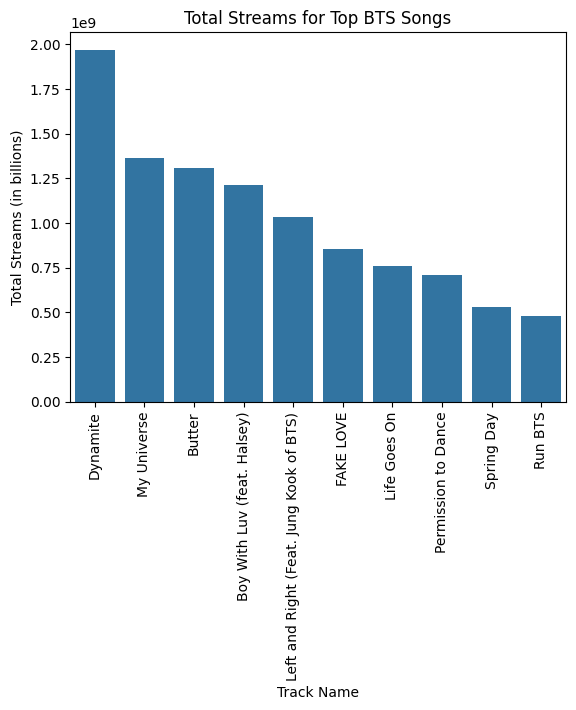

In [49]:
# plot the total streams for top BTS songs

# convert total streams column to integers before plotting
BTS_songs['total_streams'] = BTS_songs['total_streams'].str.replace(',', '').astype(int)

sns.barplot(data = BTS_songs, x = 'track_name', y = 'total_streams')
plt.title('Total Streams for Top BTS Songs')
plt.ylabel('Total Streams (in billions)')
plt.xlabel('Track Name')
plt.xticks(rotation = 90)
plt.show()

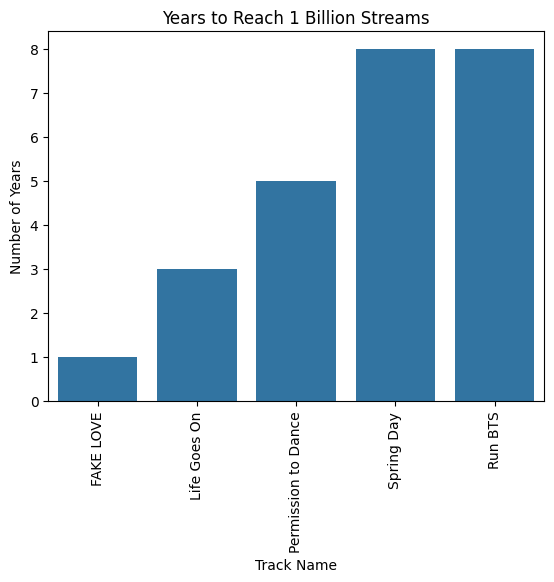

In [50]:
# plot the number of years to reach 1B streams for top songs that aren't in the billions club

sns.barplot(data = road_to_billions, x = "track_name", y = "years_to_1B")
plt.title("Years to Reach 1 Billion Streams")
plt.ylabel("Number of Years")
plt.xlabel("Track Name")
plt.xticks(rotation = 90)
plt.show()